In [3]:
import pandas as pd

In [43]:
import pandas as pd

files = ['valeursFoncieres-2019-S2.txt', 'ValeursFoncieres-2020.txt' ,'ValeursFoncieres-2021.txt' , 'ValeursFoncieres-2022.txt']
chunks = []

for file in files:
    chunk_iter = pd.read_csv(file, sep="|", low_memory=True, chunksize=100000)  
    for chunk in chunk_iter:
        chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)
pd.set_option('display.max_columns', None)  



C:\Users\HP\AppData\Local\Temp\ipykernel_5604\3699424668.py:8: DtypeWarning: Columns (24,26,28,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
C:\Users\HP\AppData\Local\Temp\ipykernel_5604\3699424668.py:8: DtypeWarning: Columns (23,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
C:\Users\HP\AppData\Local\Temp\ipykernel_5604\3699424668.py:8: DtypeWarning: Columns (24,26,29,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
C:\Users\HP\AppData\Local\Temp\ipykernel_5604\3699424668.py:8: DtypeWarning: Columns (31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
C:\Users\HP\AppData\Local\Temp\ipykernel_5604\3699424668.py:8: DtypeWarning: Columns (23,29,33) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
C:\Use

In [41]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2859666 entries, 0 to 14829575
Data columns (total 23 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   No disposition             int64  
 1   Nature mutation            object 
 2   Valeur fonciere            float64
 3   No voie                    float64
 4   Type de voie               object 
 5   Code voie                  object 
 6   Voie                       object 
 7   Code postal                int64  
 8   Commune                    int64  
 9   Code departement           object 
 10  Code commune               int64  
 11  Section                    object 
 12  No plan                    int64  
 13  Nombre de lots             int64  
 14  Code type local            float64
 15  Type local                 int64  
 16  Surface reelle bati        float64
 17  Nombre pieces principales  float64
 18  Nature culture             object 
 19  Surface terrain            float64
 20  Year  

In [44]:
#nombre de valeur manquante
df.isnull().sum() * 100 / len(df)

print(type(df["Valeur fonciere"][0]))

df["Valeur fonciere"] = df["Valeur fonciere"].str.replace(",", ".").astype(float)


<class 'str'>


In [7]:
#observer les valeurs abeérantes
print(df['Valeur fonciere'].describe())


#nombre de valeurs abérrantes
Q1 = df['Valeur fonciere'].quantile(0.25)
Q3 = df['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1
print('nombre de valeurs abérrantes : ', df[(df['Valeur fonciere'] < (Q1 - 1.5 * IQR)) | (df['Valeur fonciere'] > (Q3 + 1.5 * IQR))].shape[0])

#supprimer les valeurs abérrantes
def supprimer_valeur_abrerantes(df , nom_colonne):
    Q1 = df[nom_colonne].quantile(0.25)
    Q3 = df[nom_colonne].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[nom_colonne] > (Q1 - 1.5 * IQR)) & (df[nom_colonne] < (Q3 + 1.5 * IQR))]
    return df
   
df = supprimer_valeur_abrerantes(df, 'Valeur fonciere')   

print("nombre de valeurs abérrantes après suppression : ", df[(df['Valeur fonciere'] < (Q1 - 1.5 * IQR)) | (df['Valeur fonciere'] > (Q3 + 1.5 * IQR))].shape[0])

count    1.468204e+07
mean     1.857146e+06
std      1.951274e+07
min      1.000000e-02
25%      7.000000e+04
50%      1.650000e+05
75%      3.000000e+05
max      1.415000e+10
Name: Valeur fonciere, dtype: float64
nombre de valeurs abérrantes :  1402339
nombre de valeurs abérrantes après suppression :  0


In [47]:
valeur_null = df.isnull().sum() * 100 / len(df)
print(valeur_null)

Identifiant de document       100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                  65.297270
Nature mutation                 0.000000
Valeur fonciere                 0.000000
No voie                        37.025719
B/T/Q                          95.481422
Type de voie                   39.369558
Code voie                       0.826321
Voie                            0.829002
Code postal                     0.830312
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.309113
Section                         0.003546
No plan                         0.000000
No Volume                      99.774799
1er lot         

Nettoyer les données

In [48]:
#supprimer les colonnes qui plus de 90% des valeurs sont manquantes
for i in valeur_null.index:
    if valeur_null[i] > 90:
        df = df.drop(i, axis=1)

In [49]:
#supprimer les doublons
df = df.drop_duplicates()
df.shape


(13685231, 22)

In [50]:
df.drop('1er lot', axis=1, inplace=True)


In [51]:
df.isnull().sum() * 100 / len(df)
#summrier les lignes qui ont des valeurs manquantes
df.dropna(subset=['Code postal', 'Commune', 'Surface reelle bati', 'Nombre pieces principales', 'Type local'], inplace=True)
df.isnull().sum() * 100 / len(df)

df.dropna(subset=['No voie','Type de voie','Nature culture' , 'Surface terrain'], inplace=True)

In [52]:
df.isnull().sum() * 100 / len(df)

No disposition                0.000000
Date mutation                65.030656
Nature mutation               0.000000
Valeur fonciere               0.000000
No voie                       0.000000
Type de voie                  0.000000
Code voie                     0.000000
Voie                          0.000000
Code postal                   0.000000
Commune                       0.000000
Code departement              0.000000
Code commune                  0.000000
Section                       0.003726
No plan                       0.000000
Nombre de lots                0.000000
Code type local               0.000000
Type local                    0.000000
Surface reelle bati           0.000000
Nombre pieces principales     0.000000
Nature culture                0.000000
Surface terrain               0.000000
dtype: float64

In [54]:
#convertir les colonnes en type numerique
df['Valeur fonciere'] = pd.to_numeric(df['Valeur fonciere'], errors='coerce')
df['Surface reelle bati'] = pd.to_numeric(df['Surface reelle bati'], errors='coerce')
df['Nombre pieces principales'] = pd.to_numeric(df['Nombre pieces principales'], errors='coerce')
df['Surface terrain'] = pd.to_numeric(df['Surface terrain'], errors='coerce')


df['Date mutation'] = pd.to_datetime(df['Date mutation'], errors='coerce')
print(type(df['Date mutation'][0]))


df.head(10)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,2019-01-07,Vente,244200.0,73.0,RUE,0958,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,CN,405,0,1.0,Maison,150.0,5.0,S,695.0
1,1,2019-04-07,Vente,195000.0,852.0,CHE,0170,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,AM,237,0,1.0,Maison,94.0,4.0,AG,888.0
2,1,2019-04-07,Vente,195000.0,852.0,CHE,0170,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,AM,237,0,1.0,Maison,94.0,4.0,S,500.0
8,1,2019-01-07,Vente,211500.0,1259.0,CHE,0031,DE LA CAMBUSE,1440.0,VIRIAT,1,451,E,1673,0,1.0,Maison,108.0,4.0,S,1159.0
9,1,2019-02-07,Vente,180000.0,97.0,RUE,0605,BRICHEMER,1000.0,BOURG-EN-BRESSE,1,53,BX,267,0,1.0,Maison,97.0,5.0,S,314.0
10,1,2019-02-07,Vente,216600.0,1.0,AV,3160,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,CR,68,0,3.0,Dépendance,0.0,0.0,S,1206.0
11,1,2019-02-07,Vente,216600.0,1.0,AV,3160,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,CR,68,0,2.0,Appartement,25.0,1.0,S,1206.0
12,1,2019-02-07,Vente,216600.0,1.0,AV,3160,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,CR,68,0,2.0,Appartement,73.0,4.0,S,1206.0
13,1,2019-01-07,Vente,206473.0,54.0,ALL,2617,DES MARTINETS,1000.0,BOURG-EN-BRESSE,1,53,CW,305,0,1.0,Maison,91.0,4.0,S,728.0
14,1,2019-01-07,Vente,195690.0,616.0,RTE,0151,DE MARBOZ,1440.0,VIRIAT,1,451,AX,153,0,1.0,Maison,105.0,5.0,S,952.0


In [55]:
#supprimer les lignes ou la valeurs fonciere est 0 ou 1
df = df.loc[df['Valeur fonciere'] > 1] 

df.shape



(3167197, 21)

In [56]:
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,2019-01-07,Vente,244200.0,73.0,RUE,0958,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,CN,405,0,1.0,Maison,150.0,5.0,S,695.0
1,1,2019-04-07,Vente,195000.0,852.0,CHE,0170,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,AM,237,0,1.0,Maison,94.0,4.0,AG,888.0
2,1,2019-04-07,Vente,195000.0,852.0,CHE,0170,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,AM,237,0,1.0,Maison,94.0,4.0,S,500.0
8,1,2019-01-07,Vente,211500.0,1259.0,CHE,0031,DE LA CAMBUSE,1440.0,VIRIAT,1,451,E,1673,0,1.0,Maison,108.0,4.0,S,1159.0
9,1,2019-02-07,Vente,180000.0,97.0,RUE,0605,BRICHEMER,1000.0,BOURG-EN-BRESSE,1,53,BX,267,0,1.0,Maison,97.0,5.0,S,314.0


Prediction avec  l'algorithme XGBoost


In [57]:
#selection des colones pertinentes
X = df[['Code postal', 'Commune', 'Surface reelle bati', 'Nombre pieces principales', 'Type local', 'Surface terrain', 'Date mutation']]
y = df['Valeur fonciere']

#affichons les types de variables contenues dans notre dataset
X.dtypes





Code postal                         float64
Commune                              object
Surface reelle bati                 float64
Nombre pieces principales           float64
Type local                           object
Surface terrain                     float64
Date mutation                datetime64[ns]
dtype: object

In [77]:
#convertissons les types de variables pour 
from sklearn.calibration import LabelEncoder


X['Nombre pieces principales'] = X['Nombre pieces principales'].astype('int64')
X['Surface reelle bati'] = X['Surface reelle bati'].astype('float32')
X['Surface terrain'] = X['Surface terrain'].astype('float32')

#encoder les variables categorielles
labelencoder = LabelEncoder()
X['Code postal'] = labelencoder.fit_transform(X['Code postal'])
X['Commune'] = labelencoder.fit_transform(X['Commune'])
X['Type local'] = labelencoder.fit_transform(X['Type local'])
X.head()

,Code postal,Commune,Surface reelle bati,Nombre pieces principales,Type local,Surface terrain,year,month
0,0,3120,150.0,5,3,695.0,2019,1
1,16,9944,94.0,4,3,888.0,2019,4
2,16,9944,94.0,4,3,500.0,2019,4
8,35,26003,108.0,4,3,1159.0,2019,1
9,0,3120,97.0,5,3,314.0,2019,2


In [64]:
#colonne date-mutation en 2 colonnes
X['year'] = X['Date mutation'].dt.year
X['month'] = X['Date mutation'].dt.month



C:\Users\HP\AppData\Local\Temp\ipykernel_5604\2489194131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['year'] = X['Date mutation'].dt.year
C:\Users\HP\AppData\Local\Temp\ipykernel_5604\2489194131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['month'] = X['Date mutation'].dt.month


In [65]:
#supprimer la colonne date mutation
X = X.drop('Date mutation', axis=1)

In [66]:
X.dtypes

Code postal                    int64
Commune                        int64
Surface reelle bati          float32
Nombre pieces principales      int64
Type local                     int64
Surface terrain              float32
year                         float64
month                        float64
dtype: object

In [67]:
X.isnull().sum() * 100 / len(X)

Code postal                   0.000000
Commune                       0.000000
Surface reelle bati           0.000000
Nombre pieces principales     0.000000
Type local                    0.000000
Surface terrain               0.000000
year                         65.030656
month                        65.030656
dtype: float64

In [68]:
#supprimer les lignes avec des valeurs manquantes
X.dropna(inplace=True)
y = y[X.index]
X.isnull().sum() * 100 / len(X)

Code postal                  0.0
Commune                      0.0
Surface reelle bati          0.0
Nombre pieces principales    0.0
Type local                   0.0
Surface terrain              0.0
year                         0.0
month                        0.0
dtype: float64

In [69]:
X['year'] = X['year'].astype('int32')
X['month'] = X['month'].astype('int32')

In [70]:
X.dtypes

Code postal                    int64
Commune                        int64
Surface reelle bati          float32
Nombre pieces principales      int64
Type local                     int64
Surface terrain              float32
year                           int32
month                          int32
dtype: object

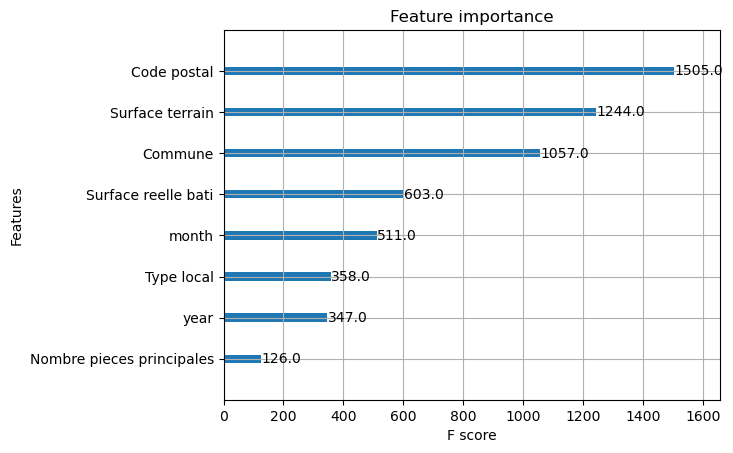

In [75]:
#importance de certaines variables
from sklearn.model_selection import train_test_split
import xgboost as xgb
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import xgboost as xgb
import matplotlib.pyplot as plt

# Entraînement du modèle
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

# Importance des variables
xgb.plot_importance(model)
plt.show()

In [84]:

model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test) 

#evaluation du modele avec R²
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

#prediction sur l'ensemble d'entrainement
y_pred = model.predict(x_train)
print(r2_score(y_train, y_pred))

0.7828162765547858
0.8595687904073886


In [ ]:
#exemple de prediction sur un nouveau dataset




[946182.25]
